In [ ]:
!wget "https://storage.googleapis.com/mledu-datasets/california_housing_train.csv"
!wget "https://storage.googleapis.com/mledu-datasets/california_housing_test.csv"

--2023-06-21 10:05:53--  https://storage.googleapis.com/mledu-datasets/california_housing_train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706430 (1.6M) [application/octet-stream]
Saving to: ‘california_housing_train.csv’

california_housing_ 100%[===================>]   1.63M  --.-KB/s    in 0.01s   

2023-06-21 10:05:53 (115 MB/s) - ‘california_housing_train.csv’ saved [1706430/1706430]

--2023-06-21 10:05:53--  https://storage.googleapis.com/mledu-datasets/california_housing_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301141 (294K) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train=pd.read_csv("california_housing_train.csv")
test= pd.read_csv("california_housing_test.csv")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   h

In [ ]:
n_train=train.shape[0]
n_test=test.shape[0]
y = train ['median_house_value'].values
data = pd.concat((train, test)).reset_index(drop= True)
data.drop(['longitude','latitude'], axis=1, inplace = True)

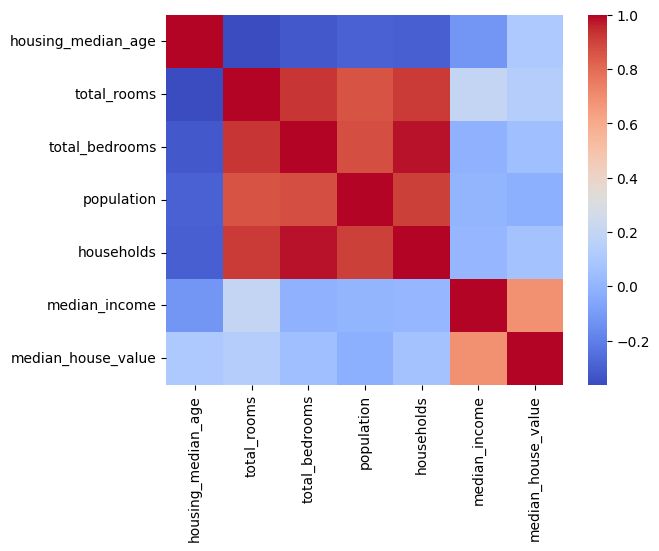

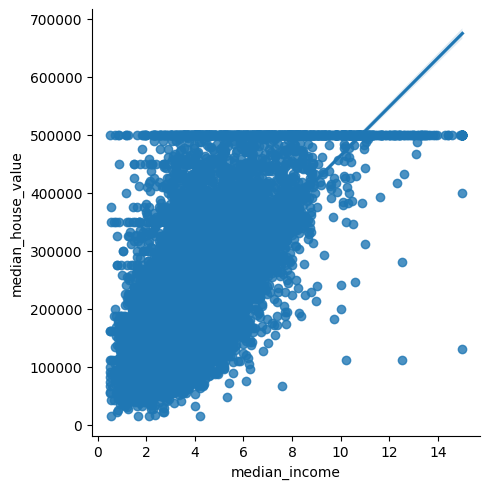

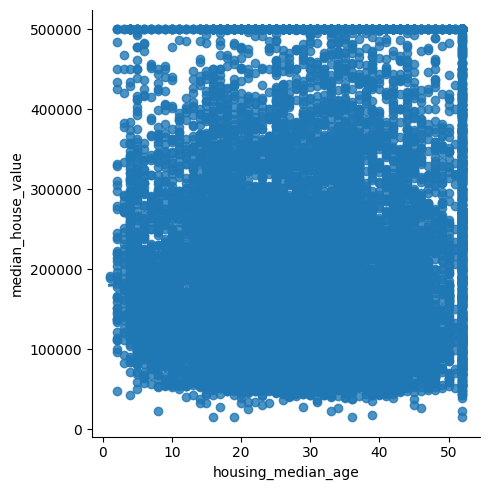

In [ ]:
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x= 'median_income', y='median_house_value', data =train)
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)

In [ ]:
sns.pairplot(train, palette='rainbow')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#feture Engineering
'''feature engineerig is the process of using domain knowledge tp extrace fetures
from raw data via data mining techniques.'''
#select appropriate features
data=data[['total_rooms','total_bedrooms','housing_median_age','median_income','population',
           'households']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20000 non-null  float64
 1   total_bedrooms      20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   median_income       20000 non-null  float64
 4   population          20000 non-null  float64
 5   households          20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


In [ ]:
data['total_rooms']=data['total_rooms'].fillna(data['total_rooms'].mean())

data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

data['housing_median_age']=data['housing_median_age'].fillna(data['housing_median_age'].mean())

data['median_income']=data['median_income'].fillna(data['median_income'].mean())

data['population']=data['population'].fillna(data['population'].mean())

data['households']=data['households'].fillna(data['households'].mean())

train = data[:n_train]
test = data[n_train:]

In [ ]:
#Fitting The Model
#Split the datasetinto training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(train, y, test_size=0.2)

y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.fit_transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.fit_transform(y_test)



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:

y_pred=regressor.predict(X_test)
y_pred=y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[212853.34952828, 445336.91827674, 110730.56578282, ...,
        227528.85612716, 218500.52054657, 185979.28106075]])

In [ ]:
df= pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(1,-1)).ravel(),
                  'Predicted Values':y_pred.ravel()})

df

,Real Values,Predicted Values
0,232700.0,212853.349528
1,273700.0,445336.918277
2,81500.0,110730.565783
3,118300.0,121996.355303
4,107500.0,140990.661910
...,...,...
3395,65900.0,124157.705151
3396,93900.0,143195.946097
3397,199600.0,227528.856127
3398,181300.0,218500.520547
